# Model Comparison

### Introduction

In this notebook, we evaluate the predictions of click and purchase probabilities made by the models we developed. Particularly, we compare the results to the actual rates determined by counting the available data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We have merged the probability predictions made by all the models into a single csv table and cleaned it. The table is saved in "predict_proba_averaged.csv", which is downloaded below into a data frame.

In [2]:
predictions_df = pd.read_csv("predict_proba_averaged.csv")

In the table, the prediction columns are labeled by the quantity, author and model. For reference, below are all the models we get predictions from.

| Author | Model | Treatment for “Currently Insured” |
| :---: | :---: | :---: |
| Josh Tawabutr | Random forest | Taking "Y", "N" and "unknown" as 3 distinct categories |
| Yushan Yang | Logistic regression | Taking "Y", "N" and "unknown" as 3 distinct categories |
| Yushan Yang | k-nearest neighbors | Taking "Y", "N" and "unknown" as 3 distinct categories |
| Angkun Wu | Neural network | Taking "Y", "N" and "unknown" as 3 distinct categories |
| Fangdi Wen | Random forest | Taking "Y", "N" and "unknown" to numerical values 1, 0 and 0.5, respectively |
| Fangdi Wen | Logistic regression | Taking "Y", "N" and "unknown" to numerical values 1, 0 and 0.5, respectively |
| Fangdi Wen | k-nearest neighbors | Taking "Y", "N" and "unknown" to numerical values 1, 0 and 0.5, respectively |
| Fangdi Wen | Support-vector machine | Taking "Y", "N" and "unknown" to numerical values 1, 0 and 0.5, respectively |

Note that the author names are provided in order for the readers to be able to conveniently navigate the dataframe, predictions_df.

In [3]:
predictions_df.sample(10)

,Unnamed: 0,Currently Insured,Number of Vehicles,Number of Drivers,Marital Status,rank,click_rate_Josh,purchase_rate_Josh,click_rate_Angkun,purchase_rate_Angkun,...,click_rate_fangdi_svm,click_rate_fangdi_knn,click_rate_fangdi_voting,purchase_rate_fangdi_log,purchase_rate_fangdi_rf,purchase_rate_fangdi_svm,purchase_rate_fangdi_knn,purchase_rate_fangdi_voting,ave_Click_pred,ave_Purchase_pred
124,124,unknown,1,1,S,5,0.293055,0.138705,0.060029,0.059523,...,0.098518,0.0,0.074827,0.017240,0.080745,0.058786,0.00,0.034405,0.129414,0.065210
165,165,unknown,3,1,M,1,0.499138,0.191838,0.516942,0.180073,...,0.344232,0.6,0.473470,0.296081,0.270165,0.206221,0.48,0.308002,0.478558,0.233070
36,36,Y,2,2,M,2,0.272471,0.087156,0.212440,0.040453,...,0.131334,0.2,0.209992,0.202437,0.156868,0.079110,0.16,0.146953,0.266880,0.129985
31,31,Y,2,2,S,2,0.190399,0.063768,0.212440,0.040453,...,0.132360,0.2,0.217052,0.229049,0.152941,0.079454,0.08,0.130567,0.265313,0.132474
62,62,N,1,1,S,3,0.155799,0.042907,0.123440,0.100391,...,0.119290,0.0,0.105344,0.071330,0.069488,0.058988,0.00,0.054606,0.157606,0.069834
146,146,unknown,2,1,M,2,0.212152,0.096204,0.314899,0.175271,...,0.131616,0.0,0.166641,0.160572,0.136276,0.075354,0.00,0.087460,0.255148,0.127886
24,24,Y,2,1,S,5,0.011257,0.000000,0.063244,0.021519,...,0.109666,0.0,0.049178,0.021604,0.041945,0.066102,0.00,0.033842,0.034252,0.019426
159,159,unknown,2,2,M,5,0.282104,0.071182,0.068344,0.024012,...,0.117117,0.0,0.064191,0.016551,0.049491,0.066471,0.00,0.031285,0.106491,0.037597
87,87,N,2,1,M,3,0.205274,0.153587,0.124280,0.076594,...,0.131647,0.2,0.145153,0.066159,0.064171,0.075731,0.12,0.080486,0.148280,0.087666
0,0,Y,1,1,S,1,0.652140,0.255747,0.286417,0.163142,...,0.649617,0.2,0.488691,0.325226,0.276688,0.368561,0.12,0.281314,0.574802,0.271308


### Model Selection using KL-divergence

Since we are comparing the predicted probabilities (of click and purchase) and not just the yes/no predictions, KL-divergence is a suitable metric to evaluate the models. The metric ranges from 0 to $\infty$, with larger values indicating worse probability prediction. We can compute the KL-divergence for the predicted click and purchase probabilities compared to those deduced from the data, for each type and rank for which the actual customer data are available. These correspond to the rows in the table above in which the actual rate is displayed as a number between 0 and 1.

In [4]:
josh_click_kl = 0
ys_logreg_click_kl = 0
ys_knn_click_kl = 0
ak_click_kl = 0
fd_logreg_click_kl = 0
fd_rf_click_kl = 0
fd_svm_click_kl = 0
fd_knn_click_kl = 0
avg_click_kl = 0
for i in predictions_df.index:
    p = predictions_df["click_rate_actual"][i]
    q_josh = predictions_df["click_rate_Josh"][i]
    q_logreg = predictions_df["click_rate_yushan_logreg"][i]
    q_knn = predictions_df["click_rate_yushan_knn"][i]
    q_angkun = predictions_df["click_rate_Angkun"][i]
    q_fangdi_logreg = predictions_df["click_rate_fangdi_log"][i]
    q_fangdi_rf = predictions_df["click_rate_fangdi_rf"][i]
    q_fangdi_svm = predictions_df["click_rate_fangdi_svm"][i]
    q_fangdi_knn = predictions_df["click_rate_fangdi_knn"][i]
    q_avg = predictions_df["ave_Click_pred"][i]
    pqlist = [p, q_josh, q_logreg, q_knn, q_angkun, q_fangdi_logreg,
            q_fangdi_rf, q_fangdi_svm, q_fangdi_knn, q_avg]
    if min(pqlist) > 1e-10 and max(pqlist) < 1:
        this_kl_josh = p*np.log(p/q_josh) + (1-p)*np.log((1-p)/(1-q_josh))
        josh_click_kl += this_kl_josh
        this_kl_logreg = p*np.log(p/q_logreg) + (1-p)*np.log((1-p)/(1-q_logreg))
        ys_logreg_click_kl += this_kl_logreg
        this_kl_knn = p*np.log(p/q_knn) + (1-p)*np.log((1-p)/(1-q_knn))
        ys_knn_click_kl += this_kl_knn
        this_kl_ak = p*np.log(p/q_angkun) + (1-p)*np.log((1-p)/(1-q_angkun))
        ak_click_kl += this_kl_ak
        this_kl_fd_logreg = p*np.log(p/q_fangdi_logreg) + (1-p)*np.log((1-p)/(1-q_fangdi_logreg))
        fd_logreg_click_kl += this_kl_fd_logreg
        this_kl_fd_rf = p*np.log(p/q_fangdi_rf) + (1-p)*np.log((1-p)/(1-q_fangdi_rf))
        fd_rf_click_kl += this_kl_fd_rf
        this_kl_fd_svm = p*np.log(p/q_fangdi_svm) + (1-p)*np.log((1-p)/(1-q_fangdi_svm))
        fd_svm_click_kl += this_kl_fd_svm
        this_kl_fd_knn = p*np.log(p/q_fangdi_knn) + (1-p)*np.log((1-p)/(1-q_fangdi_knn))
        fd_knn_click_kl += this_kl_fd_knn
        this_kl_avg = p*np.log(p/q_avg) + (1-p)*np.log((1-p)/(1-q_avg))
        avg_click_kl += this_kl_avg
print("Total KL-divergence for click rate predictions of our models are:")
print("Josh's random forest:", josh_click_kl)
print("Yushan's logistic regression:", ys_logreg_click_kl)
print("Yushan's k-nearest neighbors:", ys_knn_click_kl)
print("Angkun's neural network:", ak_click_kl)
print("Fangdi's random forest:", fd_rf_click_kl)
print("Fangdi's logistic regression:", fd_logreg_click_kl)
print("Fangdi's k-nearest neighbors:", fd_knn_click_kl)
print("Fangdi's support-vector machine:", fd_svm_click_kl)
print("Average between the 4 best models:", avg_click_kl)

Total KL-divergence for click rate predictions of our models are:
Josh's random forest: 0.24055664301146898
Yushan's logistic regression: 0.38654730839975804
Yushan's k-nearest neighbors: 2.916603853675221
Angkun's neural network: 1.8517469049986754
Fangdi's random forest: 0.44476710765564076
Fangdi's logistic regression: 0.36933194195916674
Fangdi's k-nearest neighbors: 3.3678447144095554
Fangdi's support-vector machine: 2.3502778398618487
Average between the 4 best models: 0.24836674162870903


Displayed above are the total KL-divergences for the click probability prediction. We see that the two random forest and two logistic regression models have the lowest KL-divergences that are relatively close to one another. This is in contrast to the fifth-best model, the neural network, whose total KL-divergence is more than 4 times the fourth-best model. The last line shows the KL-divergence for the model that predicts the average probability of click between the two random forest and two logistic regression models. The predictions made by this average model will be the ones we use in later stages of our project.

In [5]:
josh_purchase_kl = 0
ys_logreg_purchase_kl = 0
ys_knn_purchase_kl = 0
ak_purchase_kl = 0
fd_logreg_purchase_kl = 0
fd_rf_purchase_kl = 0
fd_svm_purchase_kl = 0
fd_knn_purchase_kl = 0
avg_purchase_kl = 0
for i in predictions_df.index:
    p = predictions_df["purchase_rate_actual"][i]
    q_josh = predictions_df["purchase_rate_Josh"][i]
    q_logreg = predictions_df["purchase_rate_yushan_logreg"][i]
    q_knn = predictions_df["purchase_rate_yushan_knn"][i]
    q_angkun = predictions_df["purchase_rate_Angkun"][i]
    q_fangdi_logreg = predictions_df["purchase_rate_fangdi_log"][i]
    q_fangdi_rf = predictions_df["purchase_rate_fangdi_rf"][i]
    q_fangdi_svm = predictions_df["purchase_rate_fangdi_svm"][i]
    q_fangdi_knn = predictions_df["purchase_rate_fangdi_knn"][i]
    q_avg = predictions_df["ave_Purchase_pred"][i]
    pqlist = [p, q_josh, q_logreg, q_knn, q_angkun, q_fangdi_logreg,
            q_fangdi_rf, q_fangdi_svm, q_fangdi_knn, q_avg]
    if min(pqlist) > 1e-10 and max(pqlist) < 1:
        this_kl_josh = p*np.log(p/q_josh) + (1-p)*np.log((1-p)/(1-q_josh))
        josh_purchase_kl += this_kl_josh
        this_kl_logreg = p*np.log(p/q_logreg) + (1-p)*np.log((1-p)/(1-q_logreg))
        ys_logreg_purchase_kl += this_kl_logreg
        this_kl_knn = p*np.log(p/q_knn) + (1-p)*np.log((1-p)/(1-q_knn))
        ys_knn_purchase_kl += this_kl_knn
        this_kl_angkun = p*np.log(p/q_angkun) + (1-p)*np.log((1-p)/(1-q_angkun))
        ak_purchase_kl += this_kl_angkun
        this_kl_fd_logreg = p*np.log(p/q_fangdi_logreg) + (1-p)*np.log((1-p)/(1-q_fangdi_logreg))
        fd_logreg_purchase_kl += this_kl_fd_logreg
        this_kl_fd_rf = p*np.log(p/q_fangdi_rf) + (1-p)*np.log((1-p)/(1-q_fangdi_rf))
        fd_rf_purchase_kl += this_kl_fd_rf
        this_kl_fd_svm = p*np.log(p/q_fangdi_svm) + (1-p)*np.log((1-p)/(1-q_fangdi_svm))
        fd_svm_purchase_kl += this_kl_fd_svm
        this_kl_fd_knn = p*np.log(p/q_fangdi_knn) + (1-p)*np.log((1-p)/(1-q_fangdi_knn))
        fd_knn_purchase_kl += this_kl_fd_knn
        this_kl_avg = p*np.log(p/q_avg) + (1-p)*np.log((1-p)/(1-q_avg))
        avg_purchase_kl += this_kl_avg
print("Total KL-divergence for purchase rate predictions of our models are:")
print("Josh's random forest:", josh_purchase_kl)
print("Yushan's logistic regression:", ys_logreg_purchase_kl)
print("Yushan's k-nearest neighbors:", ys_knn_purchase_kl)
print("Angkun's neural network:", ak_purchase_kl)
print("Fangdi's random forest:", fd_rf_purchase_kl)
print("Fangdi's logistic regression:", fd_logreg_purchase_kl)
print("Fangdi's k-nearest neighbors:", fd_knn_purchase_kl)
print("Fangdi's support-vector machine:", fd_svm_purchase_kl)
print("Average between the 4 best models:", avg_purchase_kl)

Total KL-divergence for purchase rate predictions of our models are:
Josh's random forest: 0.2283450072759551
Yushan's logistic regression: 0.26762104396177167
Yushan's k-nearest neighbors: 1.4431618849852486
Angkun's neural network: 0.7547763278821643
Fangdi's random forest: 0.5266470153634453
Fangdi's logistic regression: 0.7302412207293396
Fangdi's k-nearest neighbors: 2.8886001071152663
Fangdi's support-vector machine: 1.1428413292037747
Average between the 4 best models: 0.23693737375919977


Now, we listed above the total KL-divergences for purchase probability predictions made by our models. In this case, we see that the same four models -- random forest and logistic regression -- have lowest KL-divergences. Although the fifth-best model, neural network, performs almost as good as the fourth-best model, it is less favorable due to its higher complexity. Furthermore, discarding neural network in this case also maintains our consistency with the click probability case. Therefore, we decide to proceed again with the average probability between the two random forest and two logistic regression models. 

### Residual Plots

In addition to the KL-divergence statistic we previously computed and used as the criterion to select the best model for our probability prediction, we include the residual plots for our models in this section in order to illustrate how well the models predict the probability. Specifically, in each plot, the horizontal axis is the row index in the data frame, each of which corresponds to a unique combination of values of the categorical predictors. The vertical axis is the probability deduced from counting the raw data minus that predicted by the model. Note that only the combinations of categories with available raw data are plotted.

The first set of plots shown below are for the probability of click.

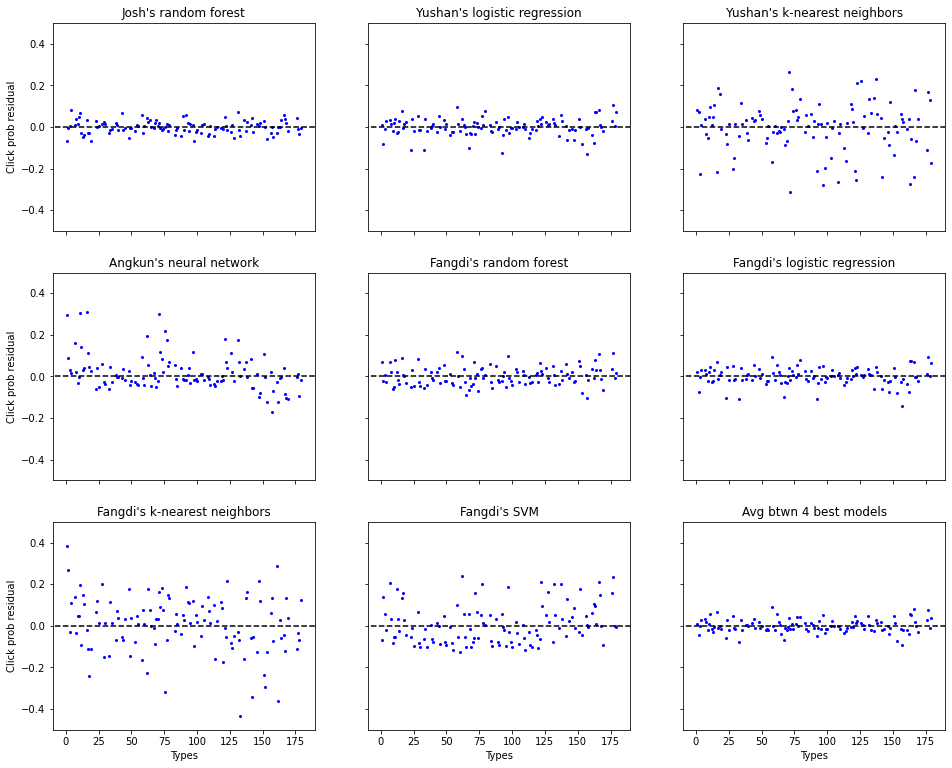

In [6]:
title_list = ["Josh's random forest", "Yushan's logistic regression", "Yushan's k-nearest neighbors",
             "Angkun's neural network", "Fangdi's random forest", "Fangdi's logistic regression",
             "Fangdi's k-nearest neighbors", "Fangdi's SVM", "Avg btwn 4 best models"]
column_list = ["click_rate_Josh", "click_rate_yushan_logreg", "click_rate_yushan_knn",
              "click_rate_Angkun", "click_rate_fangdi_rf", "click_rate_fangdi_log",
              "click_rate_fangdi_knn", "click_rate_fangdi_svm", "ave_Click_pred"]
fig, axes = plt.subplots(3, 3, figsize=(16,13), sharex=True, sharey=True)
k = 0
for i, ax in enumerate(axes.flat):
    ax.scatter(np.linspace(1, 180, 180), 
               np.array(predictions_df["click_rate_actual"]) - np.array(predictions_df[column_list[k]]),
               color = "b", s = 4)
    ax.plot(np.linspace(-20, 200, 221), np.zeros(221), "k--")
    ax.set_xlim([-10,190])
    ax.set_ylim([-0.5,0.5])
    ax.set_title(title_list[k])
    k += 1
plt.setp(axes[-1, :], xlabel='Types')
plt.setp(axes[:, 0], ylabel='Click prob residual')
plt.show()

We see from the plots that the models with lower KL-divergences have residuals that are smaller in magnitudes.

Below are the similar plots for the probability of purchase predicted by our models.

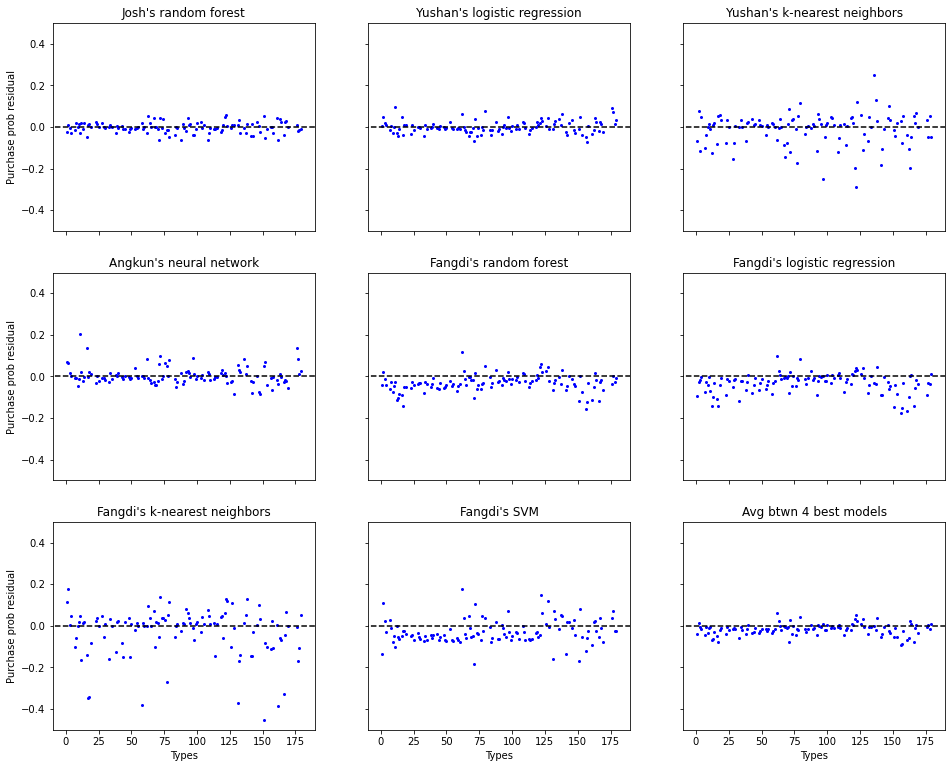

In [7]:
title_list = ["Josh's random forest", "Yushan's logistic regression", "Yushan's k-nearest neighbors",
             "Angkun's neural network", "Fangdi's random forest", "Fangdi's logistic regression",
             "Fangdi's k-nearest neighbors", "Fangdi's SVM", "Avg btwn 4 best models"]
column_list = ["purchase_rate_Josh", "purchase_rate_yushan_logreg", "purchase_rate_yushan_knn",
              "purchase_rate_Angkun", "purchase_rate_fangdi_rf", "purchase_rate_fangdi_log",
              "purchase_rate_fangdi_knn", "purchase_rate_fangdi_svm", "ave_Purchase_pred"]
fig, axes = plt.subplots(3, 3, figsize=(16,13), sharex=True, sharey=True)
k = 0
for i, ax in enumerate(axes.flat):
    ax.scatter(np.linspace(1, 180, 180), 
               np.array(predictions_df["purchase_rate_actual"]) - np.array(predictions_df[column_list[k]]),
               color = "b", s = 4)
    ax.plot(np.linspace(-20, 200, 221), np.zeros(221), "k--")
    ax.set_xlim([-10,190])
    ax.set_ylim([-0.5,0.5])
    ax.set_title(title_list[k])
    k += 1
plt.setp(axes[-1, :], xlabel='Types')
plt.setp(axes[:, 0], ylabel='Purchase prob residual')
plt.show()